In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [4]:
#Load the dataset

# read the dataset and extract the features and target separately
train = pd.read_csv("G:/Data Science ML AI/Python files/Projects/Project_Stats&Linear_Regression_Building_Football_Team/train.csv")
train.head(10)

,Id,Name,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),Position
0,17221,F. Burdenski,25,Germany,54,58,Korona Kielce,0.07,0.001,CDM
1,11353,A. Deiola,21,Italy,64,73,Cagliari,0.70,0.010,CM
2,3402,T. Castagne,21,Belgium,72,79,Atalanta,3.70,0.013,RB
3,16071,D. Gorman,21,Northern Ireland,57,66,Stevenage,0.16,0.002,CM
4,12380,N. Molina Lucero,19,Argentina,63,75,Boca Juniors,0.55,0.002,LB
5,3959,Hervías,24,Spain,72,77,Real Valladolid,4.20,0.012,RM
6,11496,D. George,19,Netherlands,64,74,FC Twente,0.70,0.002,RM
7,10773,C. Bassogog,21,Cameroon,65,72,NaN,0.00,0.000,ST
8,6989,B. Guillaume,22,Belgium,68,74,Angers SCO,1.20,0.013,ST
9,1731,S. Pérez,24,Colombia,75,80,Boca Juniors,9.00,0.020,CDM


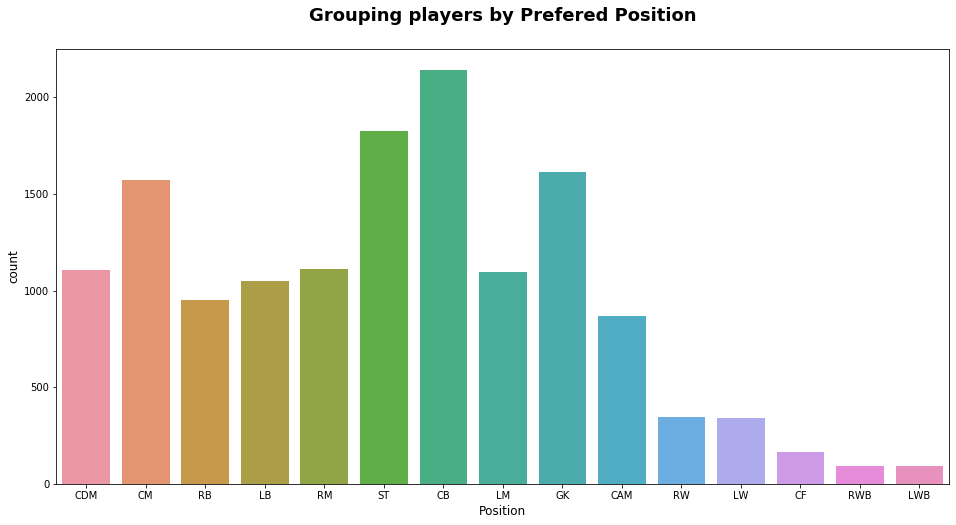

In [5]:
#Visualize the data
#Check for the categorical & continuous features.
#Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
#Check for the correlation between the features

# group of player by there position

import seaborn as sns

plt.figure(figsize=(16,8))
plt.title('Grouping players by Prefered Position', fontsize=18, fontweight='bold',y=1.05)
plt.xlabel('Number of players', fontsize=12)
plt.ylabel('Players Age', fontsize=12)
sns.countplot(x="Position", data= train)

In [6]:
# Wage distribution of top 100 players
value_distribution_values = train.sort_values("Wage (M)",ascending=False).reset_index().head(100)[["Name", "Wage (M)"]]
value_distribution_values

,Name,Wage (M)
0,L. Messi,0.565
1,Cristiano Ronaldo,0.565
2,L. Suárez,0.510
3,G. Bale,0.370
4,L. Modrić,0.340
5,T. Kroos,0.340
6,S. Agüero,0.325
7,K. Benzema,0.295
8,G. Higuaín,0.275
9,A. Sánchez,0.265


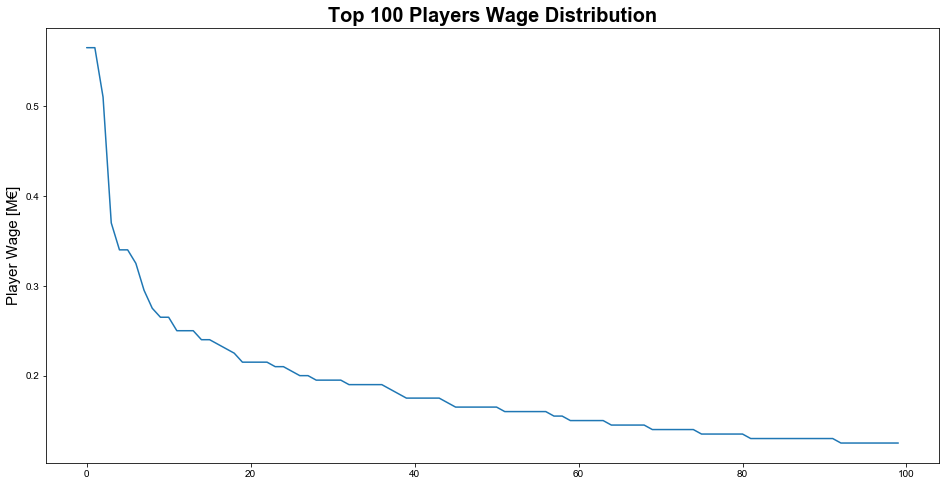

In [7]:
plt.figure(figsize=(16,8))
plt.title('Top 100 Players Wage Distribution', fontsize=20, fontweight='bold')
plt.ylabel('Player Wage [M€]', fontsize=15)
sns.set_style("whitegrid")
plt.plot(value_distribution_values['Wage (M)'])

<Figure size 432x288 with 0 Axes>

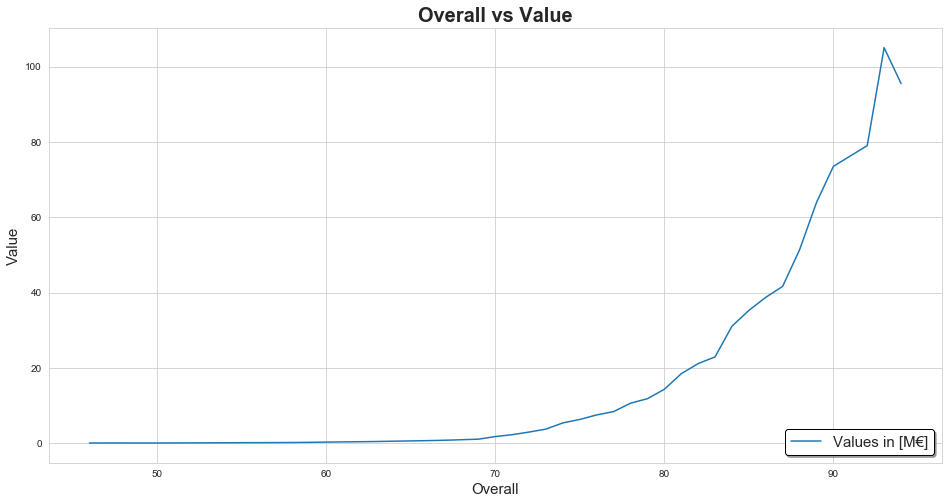

In [8]:
# Comparision graph of Overall vs values(M)

# Comparision graph of Overall vs values(M)
overall = train.sort_values('Overall')['Overall'].unique()

    
overall_value = train.groupby(['Overall'])['Value (M)'].mean()
    
plt.figure()
plt.figure(figsize=(16,8))
plt.title('Overall vs Value', fontsize=20, fontweight='bold')
plt.xlabel('Overall', fontsize=15)
plt.ylabel('Value', fontsize=15)
sns.set_style("whitegrid")
plt.plot(overall, overall_value, label="Values in [M€]")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")

In [9]:
#Model building

X = train.drop(['Value (M)'],axis =1)
y = train['Value (M)']

# independent variables
X = X[['Overall','Potential','Wage (M)']]

# Separate into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

print(X_train.head(5))
print("-------------------------------------")
print(y_train.head(5))

       Overall  Potential  Wage (M)
2980        62         68     0.001
6908        67         67     0.006
13612       65         65     0.005
8104        76         79     0.026
12566       57         72     0.001
-------------------------------------
2980      0.425
6908      0.180
13612     0.550
8104     10.000
12566     0.210
Name: Value (M), dtype: float64


In [10]:
# Instantiate linear regression
model = LinearRegression()

# fit the model on training data
model.fit(X_train,y_train)

# make prediction
y_pred = model.predict(X_test)
y_pred

array([-0.45921139,  5.83591782,  5.44771333, ...,  2.56732764,
        8.51045379, 10.6209457 ])

In [11]:
# calculate the mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
mae

1.3431536912551685

In [12]:
# calculate the r2 score
r2 = r2_score(y_test,y_pred)
r2

0.7587733808397649

In [13]:
#Prediction on the test data and creating the sample submission file
# Prediction on test data

# Read the test data
test = pd.read_csv("G:/Data Science ML AI/Python files/Projects/Project_Stats&Linear_Regression_Building_Football_Team/test.csv")
test.head(10)

,Id,Name,Age,Nationality,Overall,Potential,Club,Wage (M),Position
0,280,C. Vela,28,Mexico,82,82,Real Sociedad,0.046,ST
1,569,J. Stones,23,England,79,85,Manchester City,0.105,CB
2,8731,V. Vermeij,22,Netherlands,67,74,Heracles Almelo,0.007,ST
3,10085,G. Omae,27,Japan,65,65,Omiya Ardija,0.002,CAM
4,9831,N. Miatke,27,Germany,66,67,FSV Zwickau,0.001,LM
5,7346,T. Şahin,29,Turkey,68,68,Evkur Yeni Malatyaspor,0.010,RM
6,10496,J. Fabri,23,France,65,73,Stade Brestois 29,0.001,GK
7,8318,O. Aydın,23,Germany,67,75,Chemnitzer FC,0.001,LM
8,17589,A. Al Yousif,19,Saudi Arabia,52,62,Al Fateh,0.002,CB
9,3615,Clayton Fildeiras,33,Brazil,72,72,Sociedade Esportiva Palmeiras,0.023,CM


In [14]:
# Storing the id from the test file
id_ = test['Id']

# Dropping the same columns from the test data
test = test[['Overall','Potential','Wage (M)']]

test.head()

,Overall,Potential,Wage (M)
0,82,82,0.046
1,79,85,0.105
2,67,74,0.007
3,65,65,0.002
4,66,67,0.001


In [21]:
# Predict on the test data
y_pred_test = model.predict(test)
y_pred_test

array([10.60460597, 20.02308035,  2.10246886, ...,  1.59249244,
       13.55096875,  6.2474722 ])

In [22]:
# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'Value (M)':y_pred_test})

# Convert the sample submission file into a csv file
sample_submission.to_csv('sample_submission.csv',index=False)